import library

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [34]:
#reading the csv file
data=pd.read_csv('Test.csv')

In [35]:
# the first 5 rows of data 
data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [36]:
# is there is null in data
data.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [37]:
# Describe Data
data['Item_Weight'].describe()

count    4705.000000
mean       12.695633
std         4.664849
min         4.555000
25%         8.645000
50%        12.500000
75%        16.700000
max        21.350000
Name: Item_Weight, dtype: float64

In [38]:
#change the data null to the mean data of the colomn
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)

In [39]:

mode_of_Outlet_size = data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [40]:
miss_values = data['Outlet_Size'].isnull()
print(miss_values)   

0       False
1        True
2        True
3        True
4       False
        ...  
5676    False
5677    False
5678     True
5679     True
5680     True
Name: Outlet_Size, Length: 5681, dtype: bool


In [41]:
data.loc[miss_values, 'Outlet_Size'] = data.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

<Axes: >

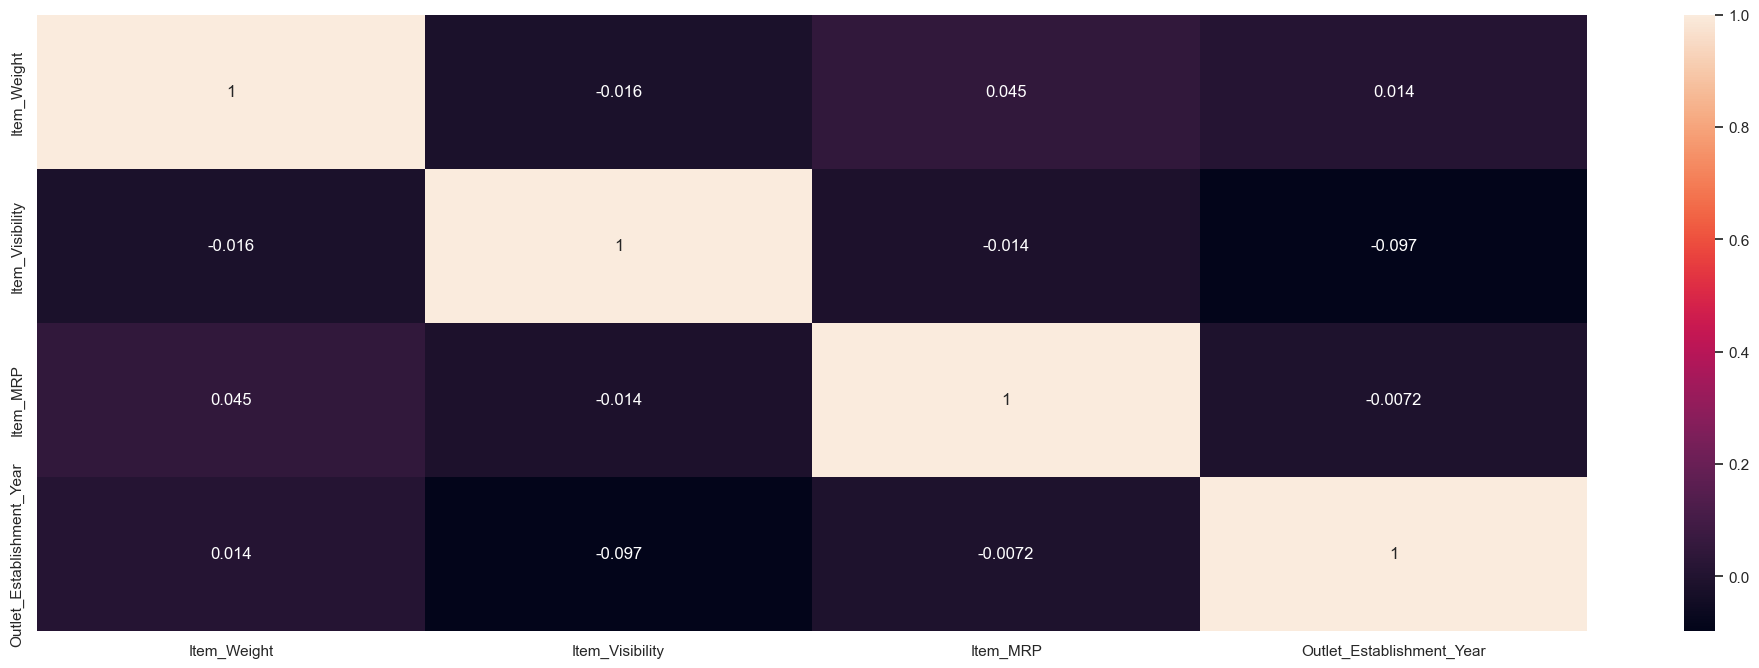

In [42]:
# correlation matrix
plt.figure(figsize=(25,8))
sns.heatmap(data.select_dtypes(exclude='object').corr(),annot=True)

/var/folders/l0/4vlfv_h14psdkdgqhr2v8sqw0000gn/T/ipykernel_10891/2910968879.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Item_Weight'])


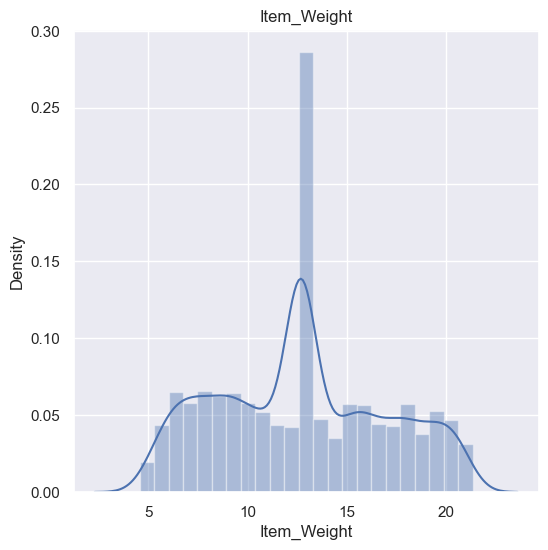

In [43]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['Item_Weight'])
plt.title('Item_Weight')
plt.show()

/var/folders/l0/4vlfv_h14psdkdgqhr2v8sqw0000gn/T/ipykernel_10891/553180132.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Item_Visibility'])


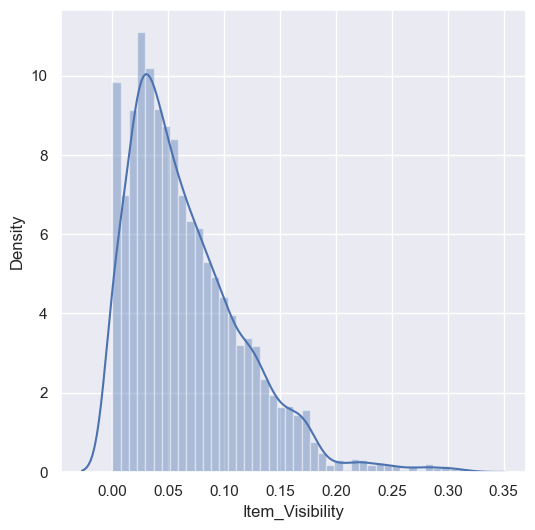

In [44]:
plt.figure(figsize=(6,6))
sns.distplot(data['Item_Visibility'])
plt.show()

/var/folders/l0/4vlfv_h14psdkdgqhr2v8sqw0000gn/T/ipykernel_10891/517176527.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Item_MRP'])


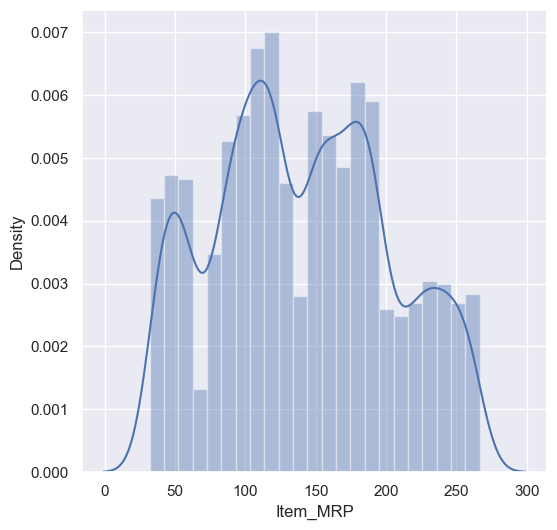

In [45]:
plt.figure(figsize=(6,6))
sns.distplot(data['Item_MRP'])
plt.show()

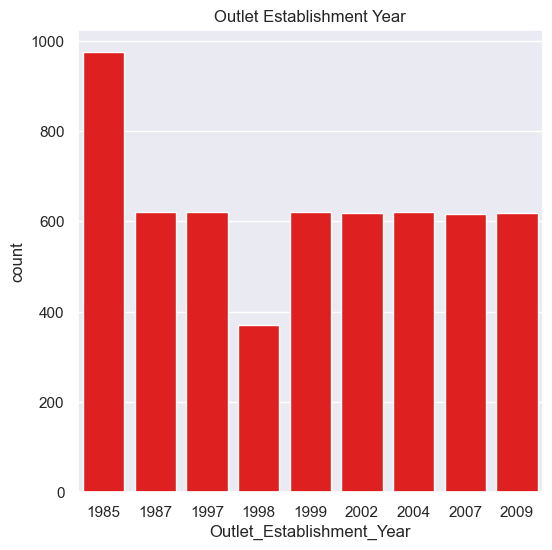

In [46]:
plt.figure(figsize=(6,6),)
sns.countplot(x='Outlet_Establishment_Year', data=data,color='red')
plt.title('Outlet Establishment Year')
plt.show()

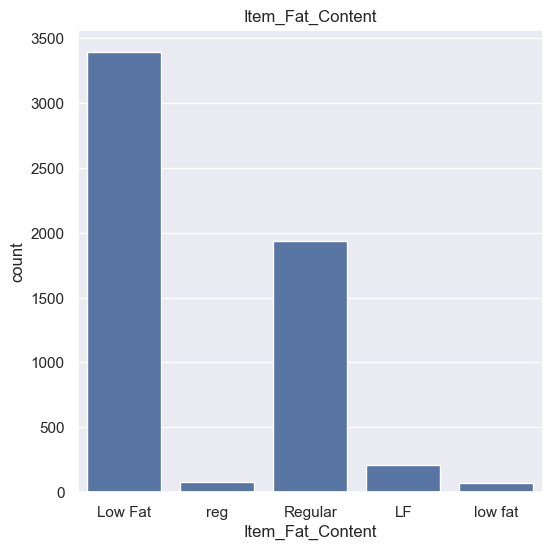

In [47]:
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=data)
plt.title('Item_Fat_Content')
plt.show()

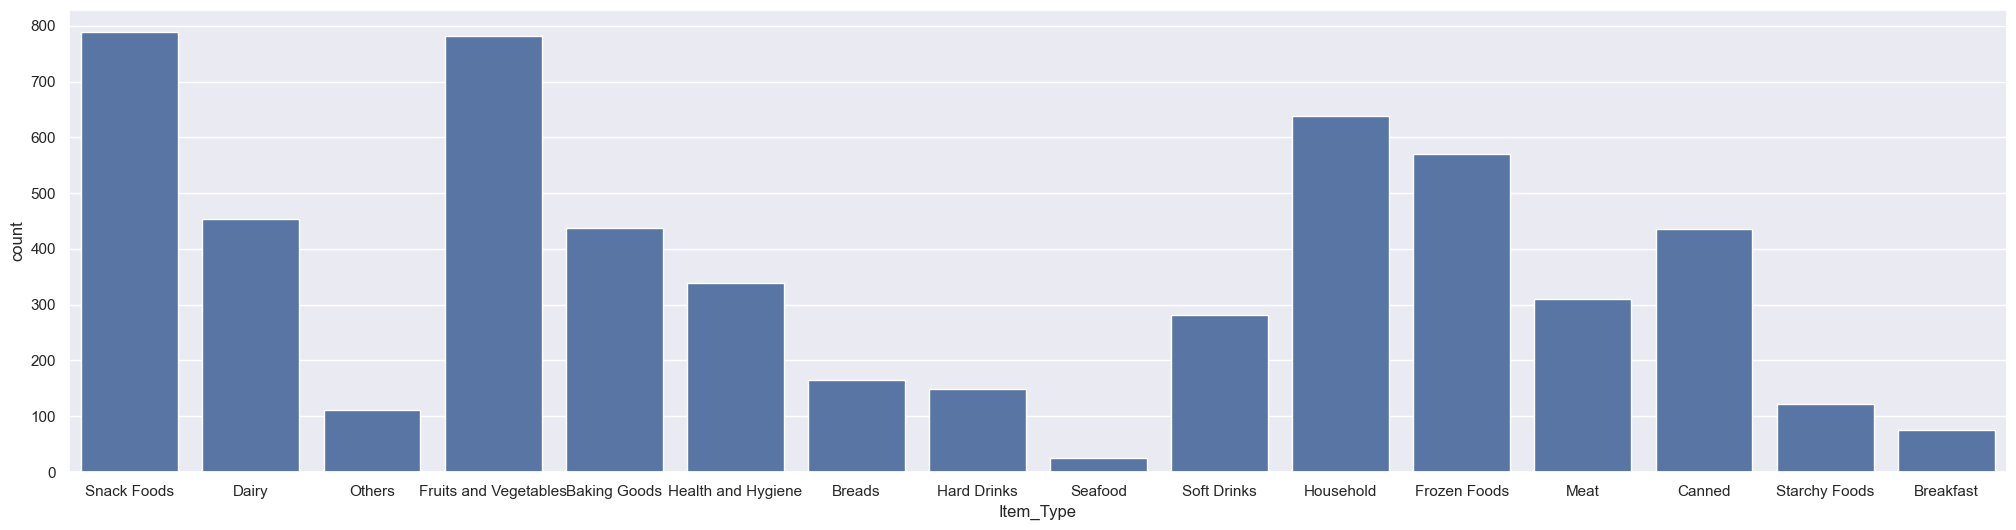

In [48]:
# Item Type column
plt.figure(figsize=(25,6))
sns.countplot(x='Item_Type', data=data)
plt.show()

In [49]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: count, dtype: int64

In [50]:
#Reduce values
data['Item_Fat_Content']=data['Item_Fat_Content'].replace({'LF':'Low Fat','reg': 'Regular','LF':'low fat'} )

In [51]:
#Converting category labels into numerical using LabelEncoder
encoder = LabelEncoder()
data['Item_Identifier'] = encoder.fit_transform(data['Item_Identifier'])
data['Item_Fat_Content'] = encoder.fit_transform(data['Item_Fat_Content'])
data['Item_Type'] = encoder.fit_transform(data['Item_Type'])
data['Outlet_Identifier'] = encoder.fit_transform(data['Outlet_Identifier'])
data['Outlet_Size'] = encoder.fit_transform(data['Outlet_Size'])
data['Outlet_Location_Type'] = encoder.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Type'] = encoder.fit_transform(data['Outlet_Type'])

In [52]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,1,0.038428,4,87.3198,2,2007,2,1,1
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,2,2,0
3,809,7.315000,0,0.015388,13,155.0340,2,2007,2,1,1
4,1184,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3


In [53]:
# separating the predictors and the target column
X=data.drop('Outlet_Type',axis=1)
y=data['Outlet_Type']

In [54]:
y.value_counts()

Outlet_Type
1    3717
0     722
3     624
2     618
Name: count, dtype: int64

In [55]:
# splitting the dataset using train_test_split 
# train:test = 80:20
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print(X.shape, x_train.shape, x_test.shape)

(5681, 10) (4544, 10) (1137, 10)


bulid the model

In [56]:
Model=RandomForestClassifier(criterion='gini',n_estimators=50,max_depth=2, random_state=33)
Model.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=50, random_state=33)

In [57]:
# getting the predictions
y_pred =Model.predict(x_test)
y_pred


array([1, 1, 1, ..., 1, 1, 1])

computing the accuracy of our model

In [58]:
classification_report= classification_report(y_test,y_pred)
print('classification_report :\n',classification_report)

classification_report :
               precision    recall  f1-score   support

           0       1.00      0.48      0.65       134
           1       0.92      1.00      0.96       767
           2       1.00      1.00      1.00       124
           3       1.00      1.00      1.00       112

    accuracy                           0.94      1137
   macro avg       0.98      0.87      0.90      1137
weighted avg       0.94      0.94      0.93      1137



In [59]:
training_data_prediction = Model.predict(x_train)
r2_train = metrics.r2_score(y_train, training_data_prediction)
print('R Squared value = ', r2_train)

R Squared value =  0.8979474195639707


In [60]:
r2_test = metrics.r2_score(y_test, y_pred)
print(r2_train)

0.8979474195639707
